In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [60]:
#variables 
seed = 1161
N_train = int(201)
N_test = int(101)
K = np.arange(1,61)
N_fold = 5

In [61]:
#Equations 
def f_opt(x):
    return np.sin(2.0 * np.pi * x)

In [62]:
#calculate the RMSE 
def rmse(y_true, y_pred):
    return float(np.sqrt(np.mean((y_true - y_pred) ** 2)))

In [63]:
#Generate the test, vaildation, and training set 
def generate_sets(seed, N_train, N_test):
    x_tr = np.linspace(0, 1, N_train)
    x_te =np.linspace(0, 1, N_test)
    np.random.randn(seed)
    t_tr = f_opt(x_tr) + 0.2*np.random.randn(N_train)
    t_te = f_opt(x_te) + 0.2*np.random.randn(N_test)
    return x_tr, t_tr, x_te, t_te

In [64]:
def eucladian_distance (x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

In [87]:
def eu_distances (x_te, x_tr):
    #this function will make a matrix of size (N_test, N_train) 
    #There will be N_test Rows and each row has the distance of the test point to each training point 
    #compute the distances 
    #distances = [eucladian_distance(x_test, x_train)]
    #get the closest k
    #argsort:tells you where the orginal indices from the x_train would be after they are sorted
    #k_indices = np.argsort(distances)
    distances = np.zeros((N_test, N_train), dtype = float)
    for i in range (N_test):
        for j in range (N_train):
            distances[i,j] = eucladian_distance(x_te[i], x_tr[j])
    k_indices = np.argsort(distances)
    return distances, k_indices 

In [88]:
def y_pred (k, k_indices, t_tr):
    y_pred = np.zeros ((N_test), dtype= float)
    for i in range (N_test):
        sum_avg=0
        for x in k_indices[i, :k]:
            sum_avg += t_tr[x]
        y_pred[i] = sum_avg/k
    return y_pred

In [89]:
def plot_func (y):
    x_plot = np.linspace(0.0, 1.0, 400)
    f_opt_plot = np.sin(2 * np.pi * x_plot)
    plt.plot(x_plot, f_opt_plot, color='black', label="Optimal Prediction")
    plt.scatter(x_tr, t_tr, color='magenta', label= "Traning Data")
    plt.plot(x_te, y_pre, color='green', label = "Prediction Curve") #y_one is predicted values
    plt.scatter(x_te, t_te, color='blue', label = "Test Data") #test data 
    plt.legend()
    plt.show() 

In [98]:
def main():
    x_tr, t_tr, x_te, t_te = generate_sets(seed, N_train, N_test)
    dist, k_indices = eu_distances(x_te, x_tr)
    rmse_k = [];
    for k in K:
        y_pre = y_pred(k, k_indices, t_tr)
        r_te = rmse(t_te, y_pre)
        rmse_k.append(r_te)
        plt.title(f'K={k} ')
        x_plot = np.linspace(0.0, 1.0, 400)
        f_opt_plot = np.sin(2 * np.pi * x_plot)
        plt.plot(x_plot, f_opt_plot, color='black', label="Optimal Prediction")
        plt.scatter(x_tr, t_tr, color='magenta', label= "Traning Data")
        plt.plot(x_te, y_pre, color='green', label = "Prediction Curve") #y_one is predicted values
        plt.scatter(x_te, t_te, color='blue', label = "Test Data") #test data 
        plt.legend()
        plt.show() 

    #k-fold 
    

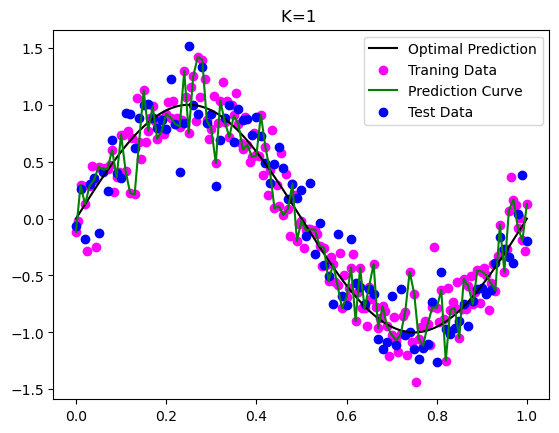

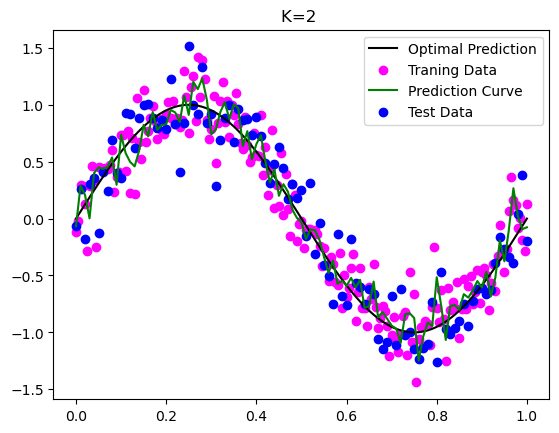

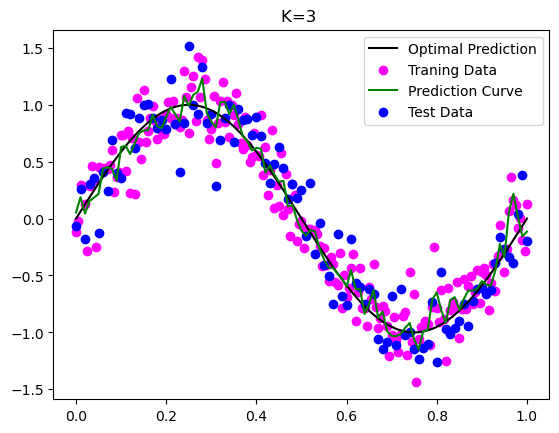

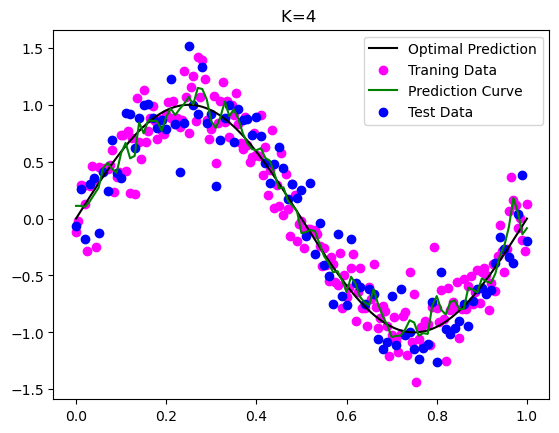

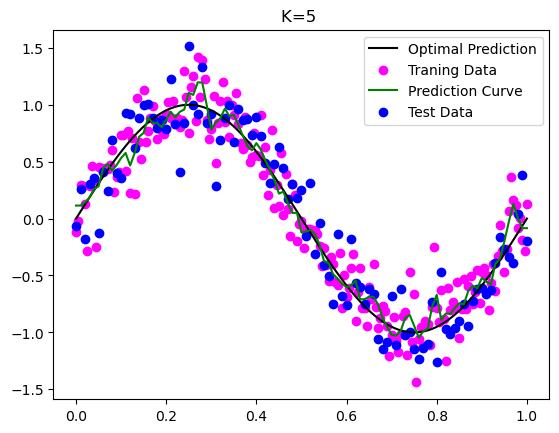

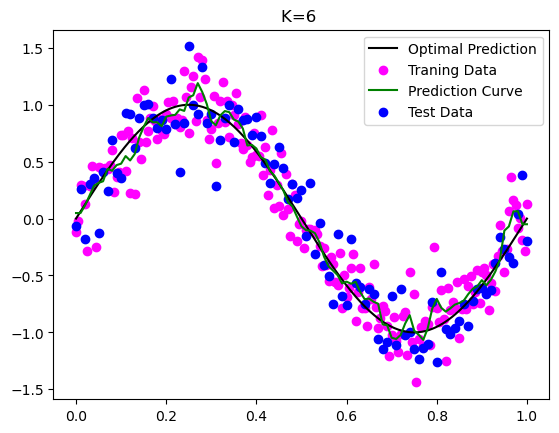

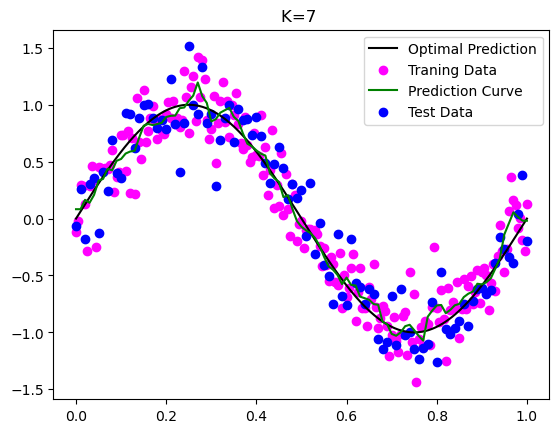

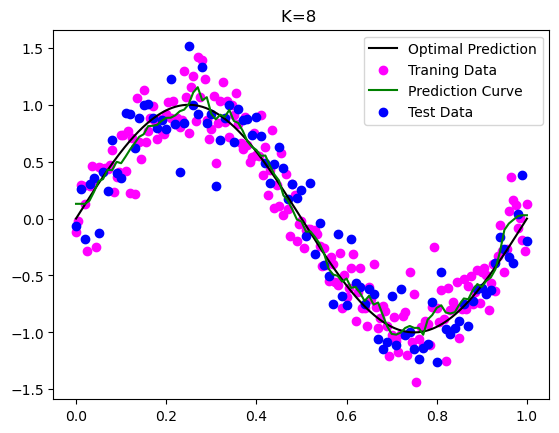

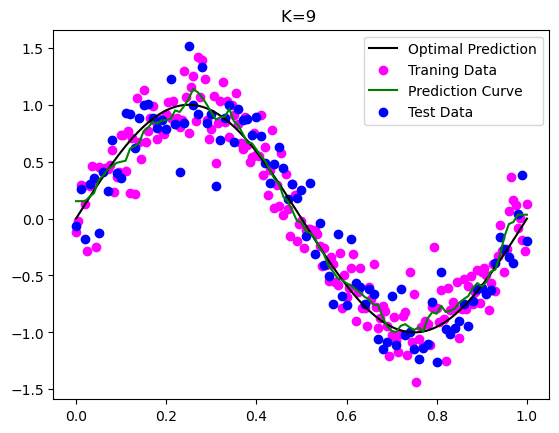

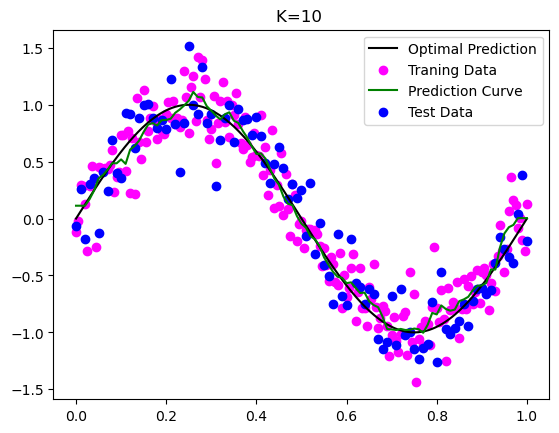

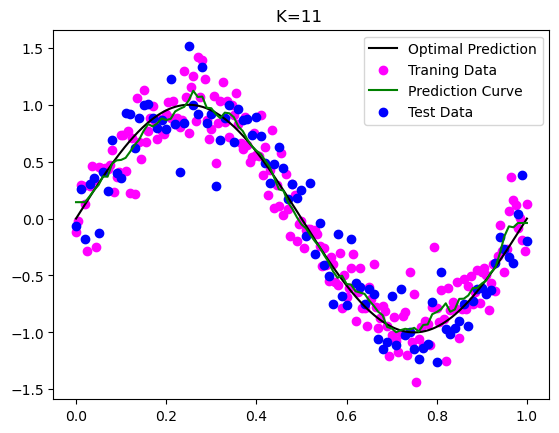

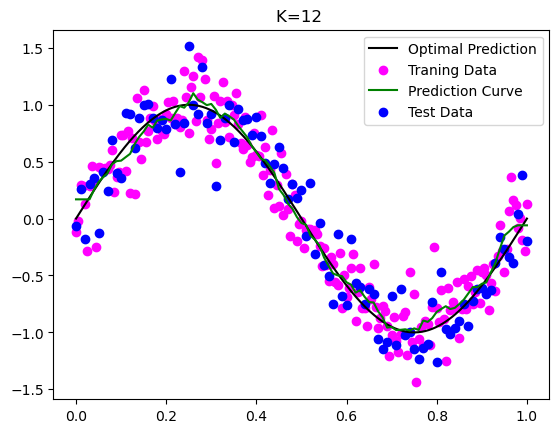

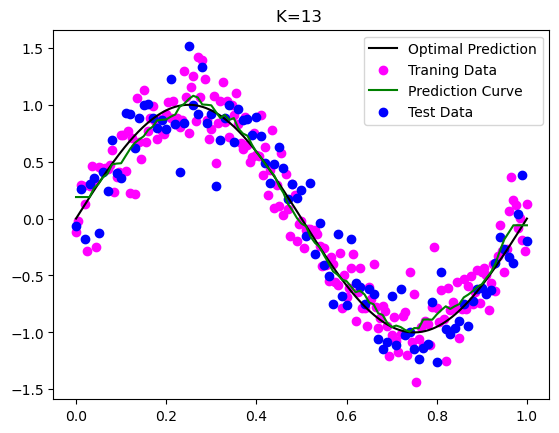

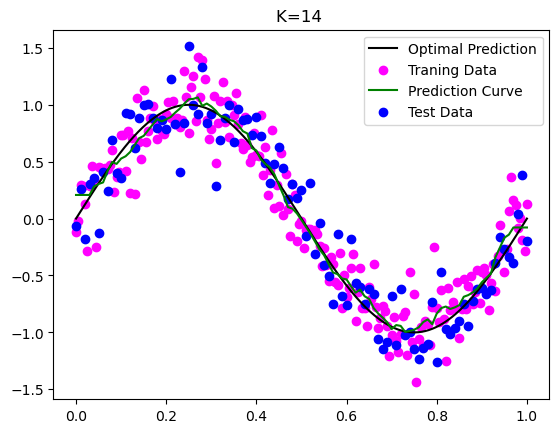

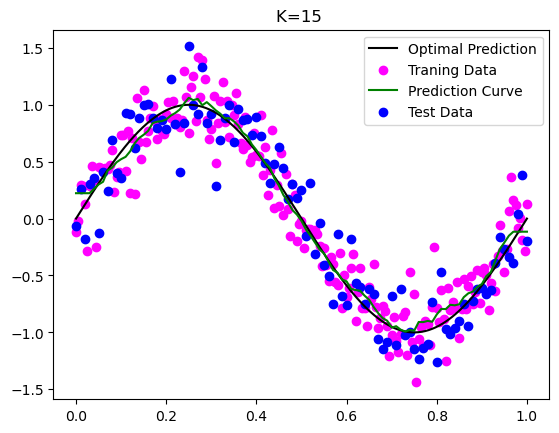

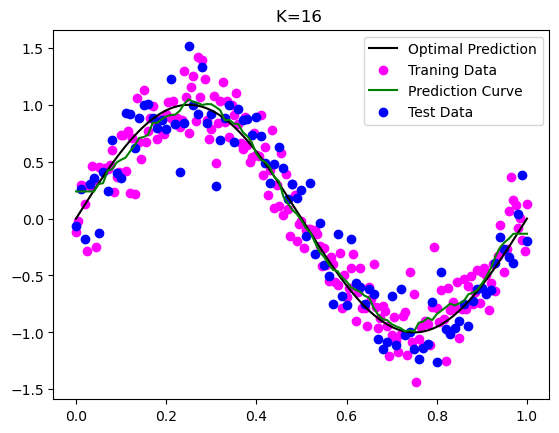

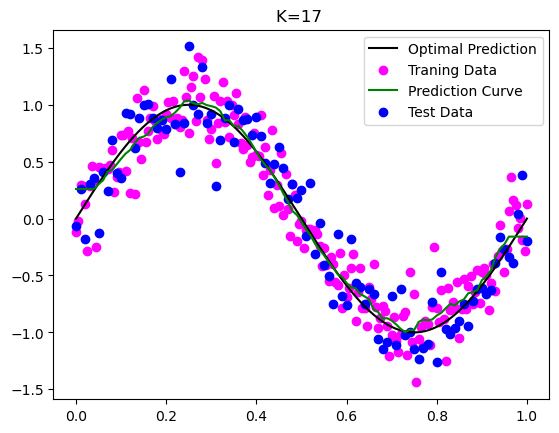

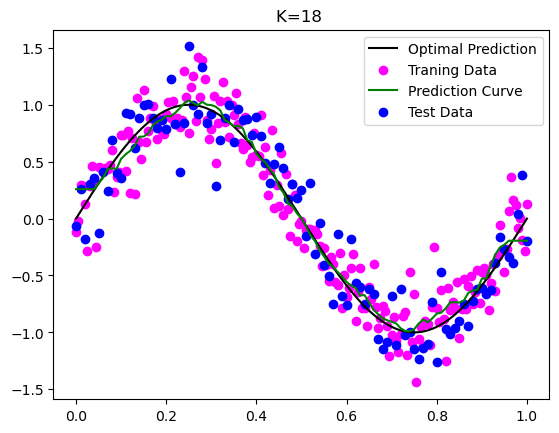

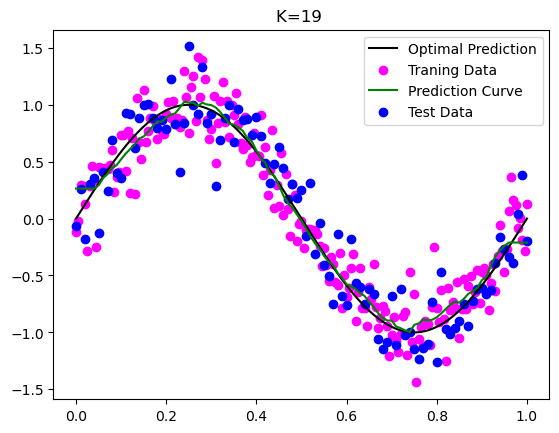

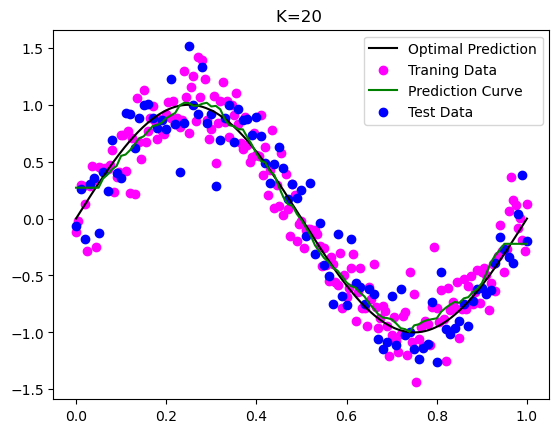

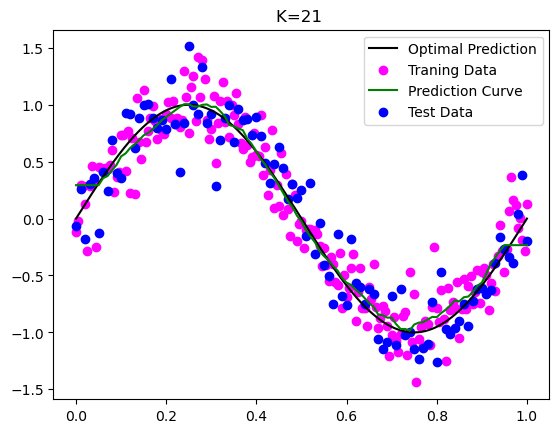

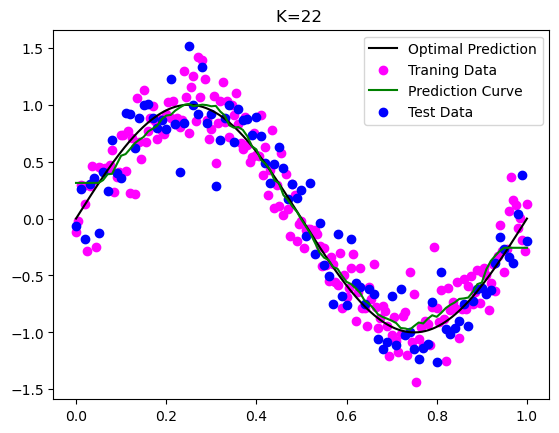

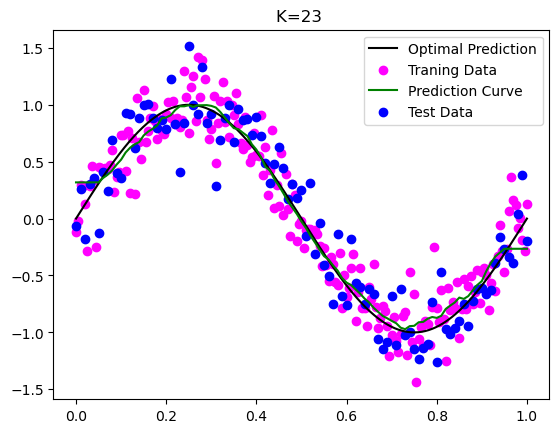

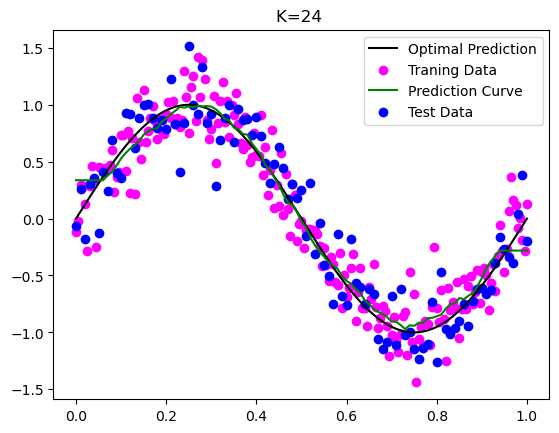

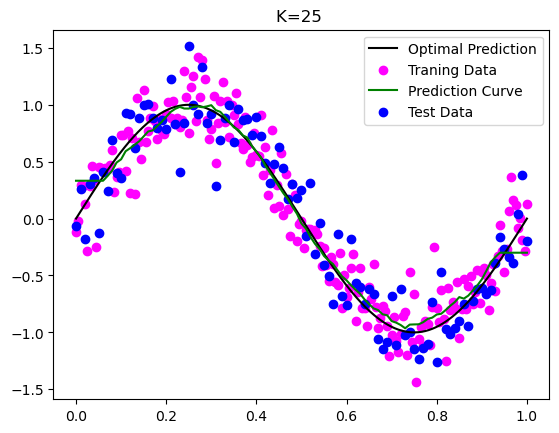

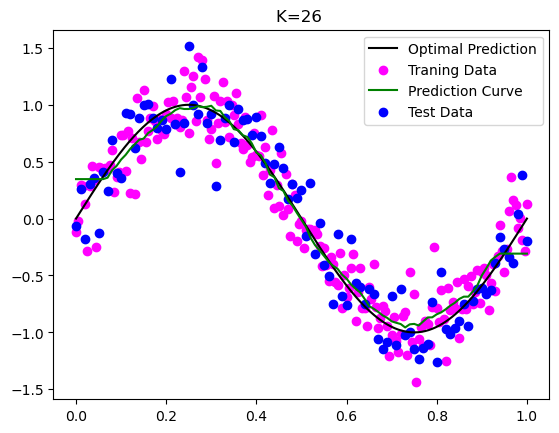

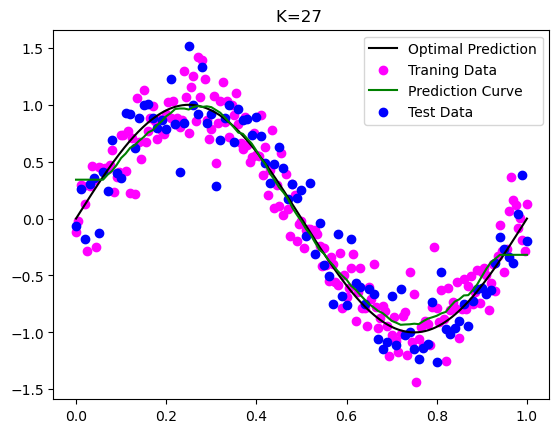

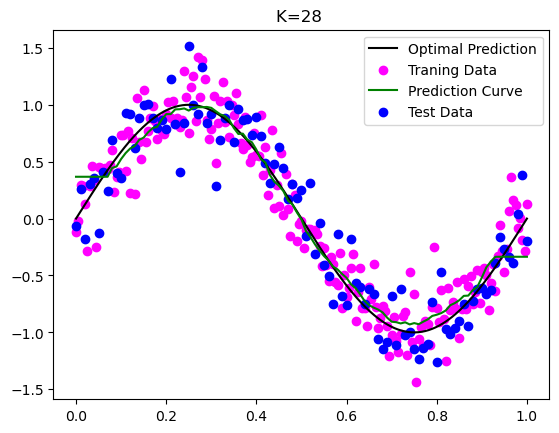

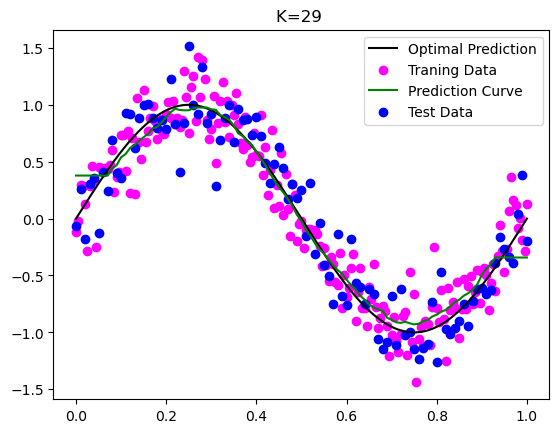

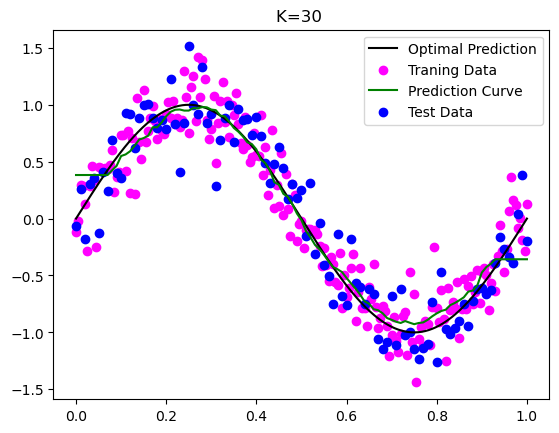

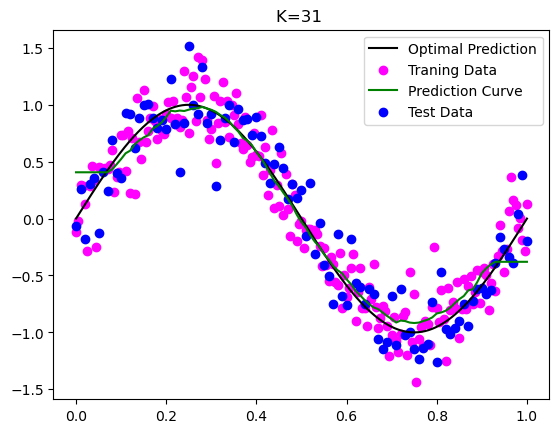

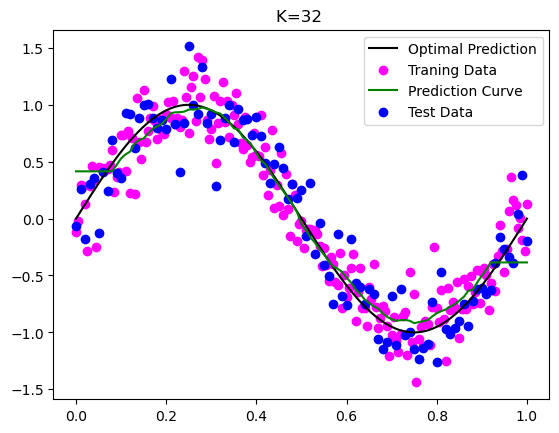

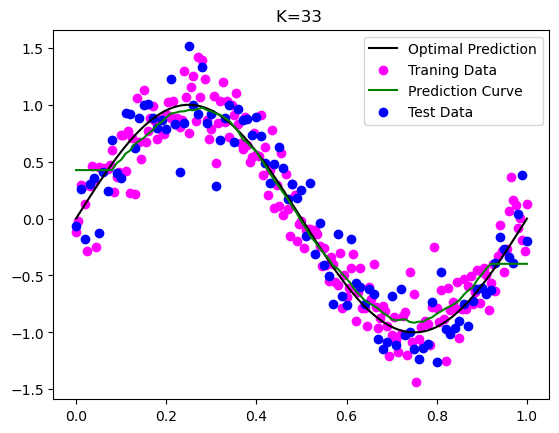

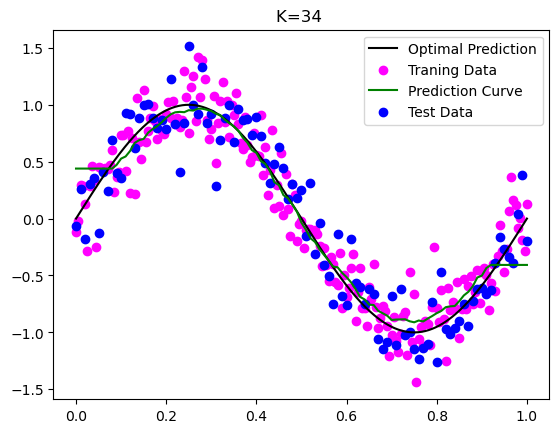

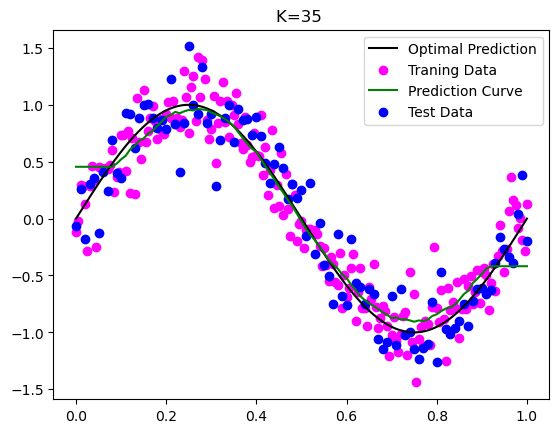

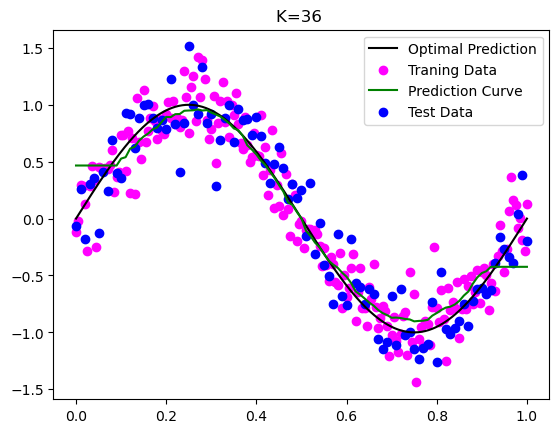

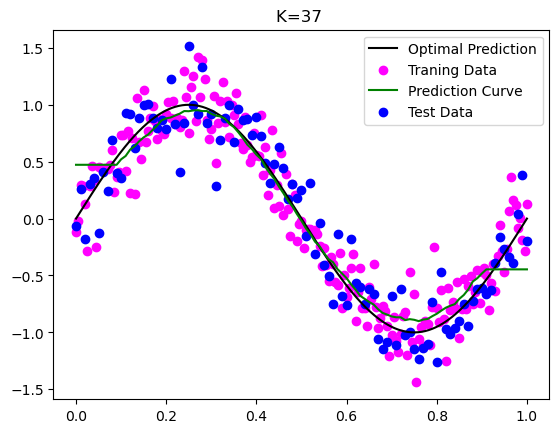

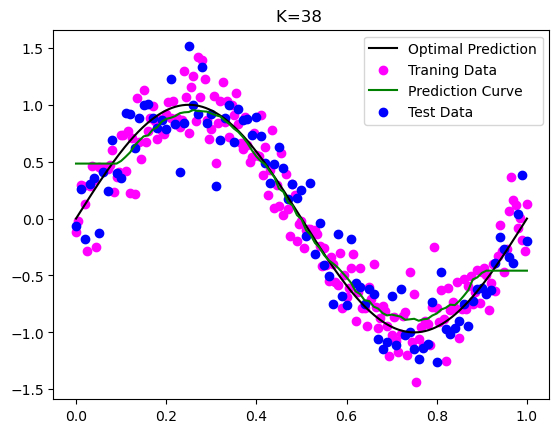

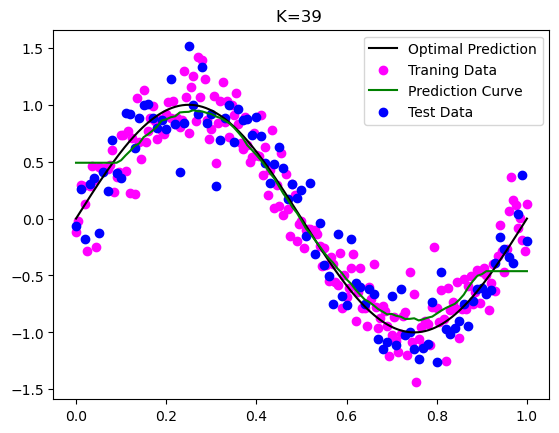

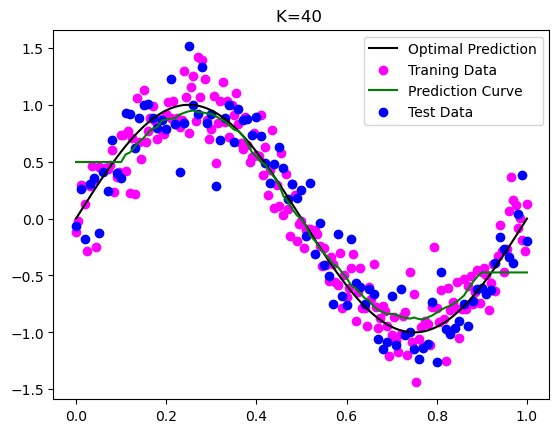

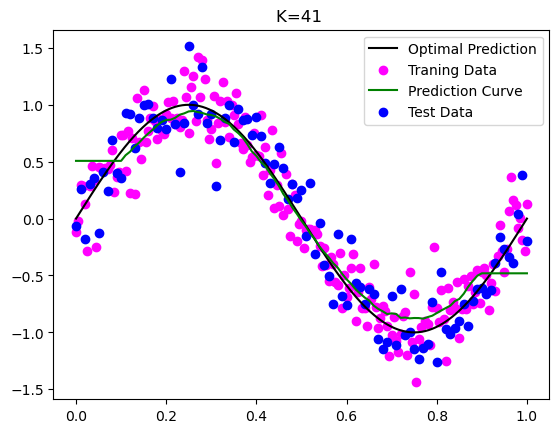

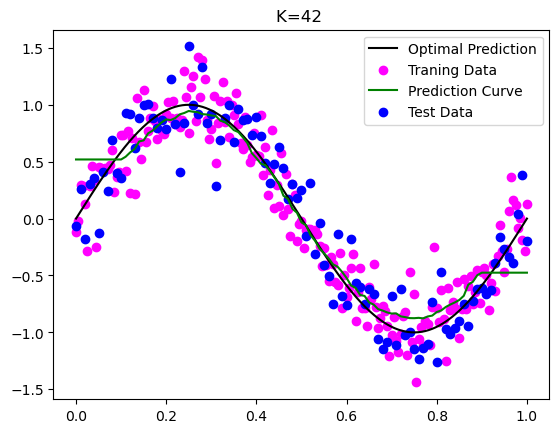

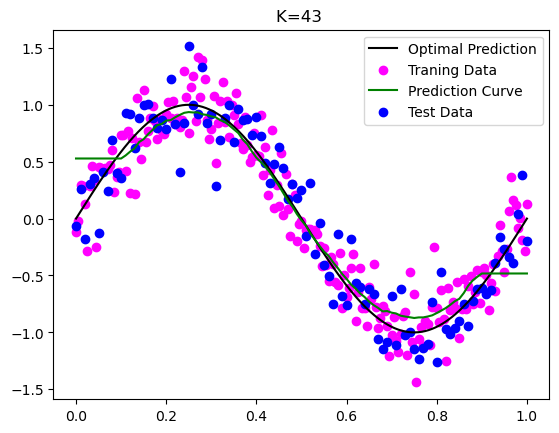

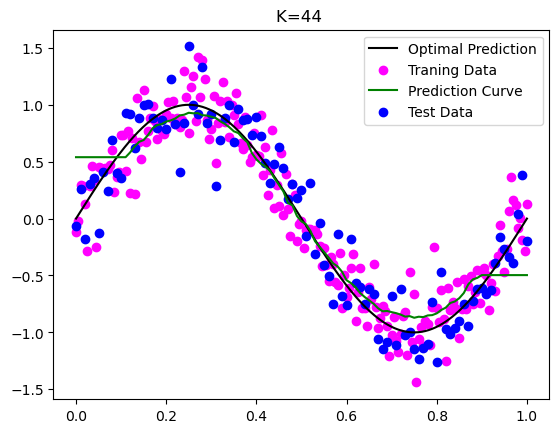

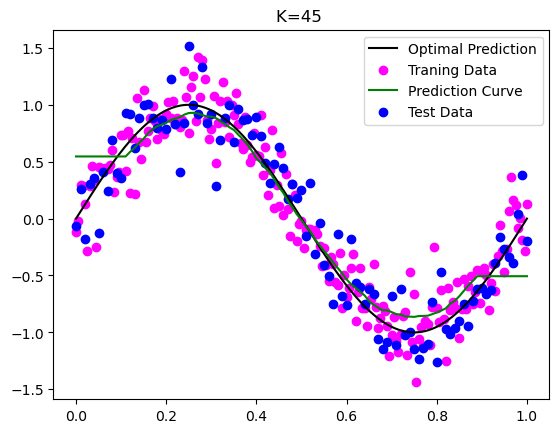

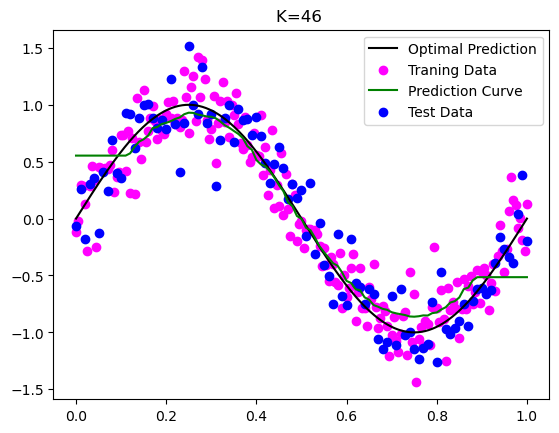

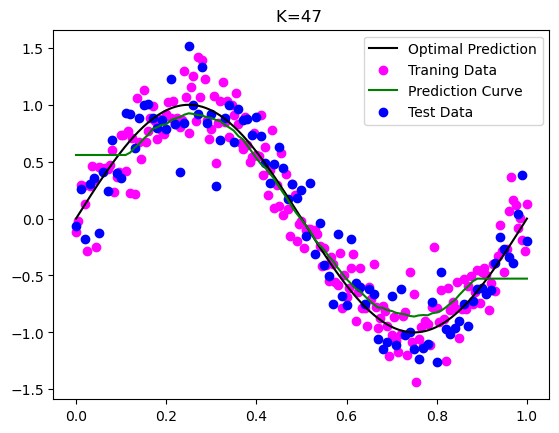

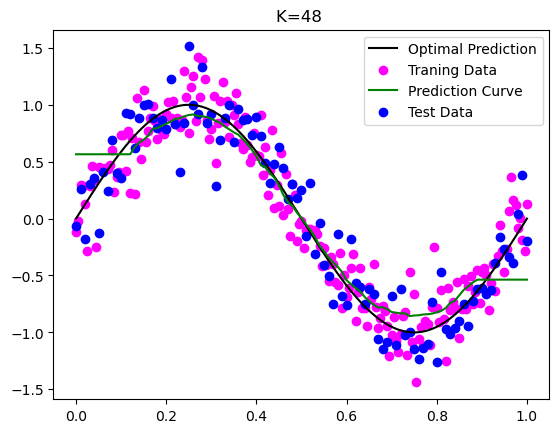

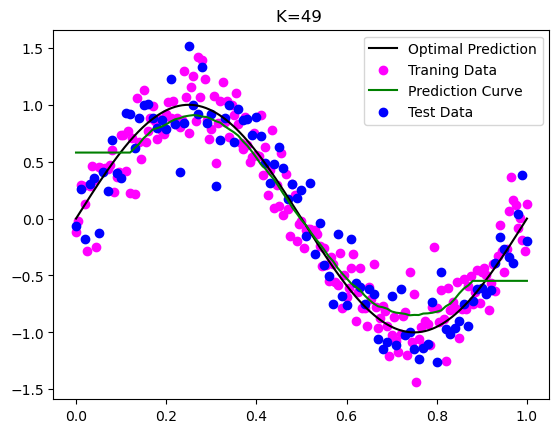

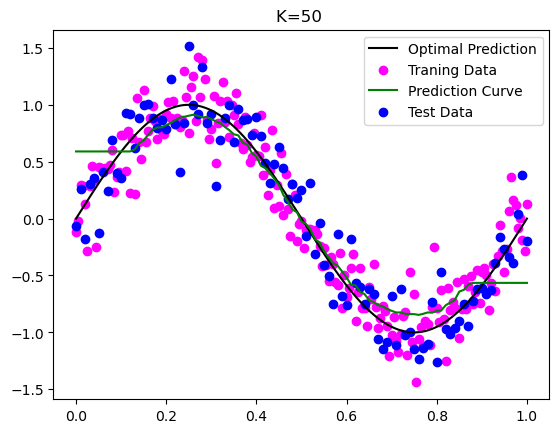

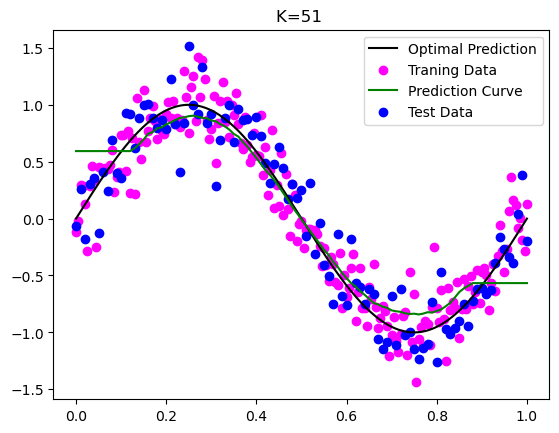

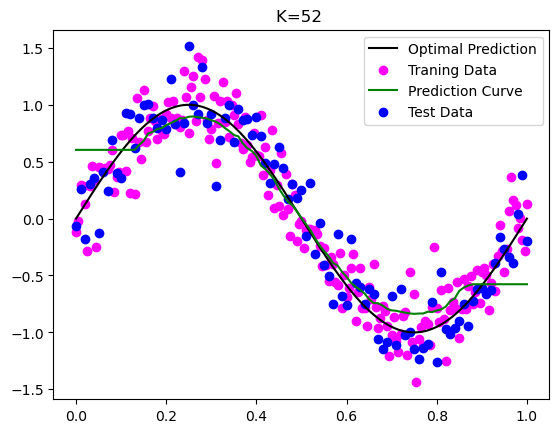

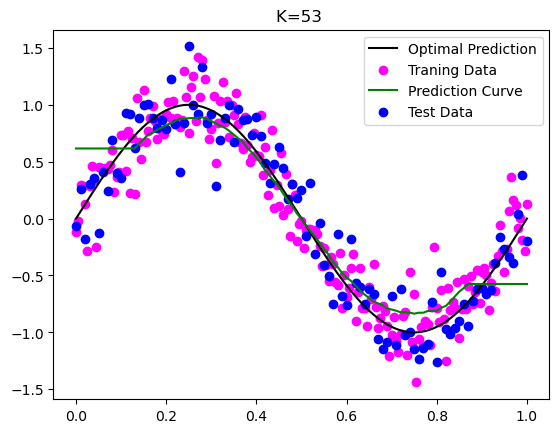

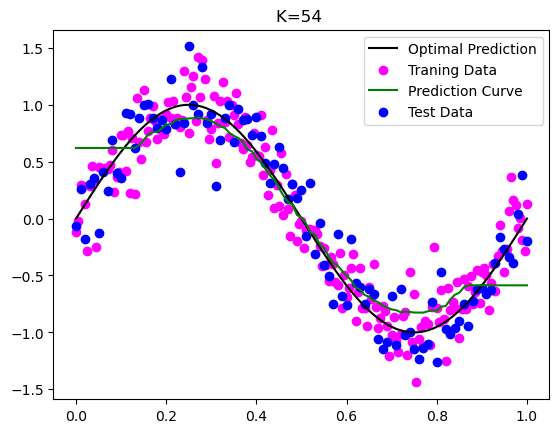

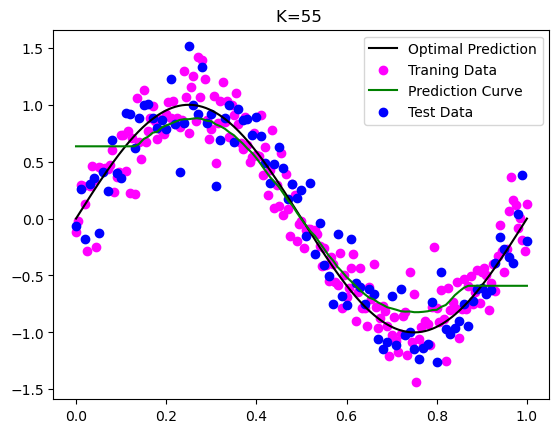

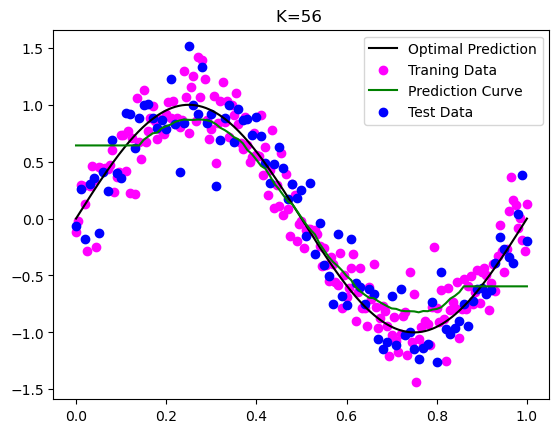

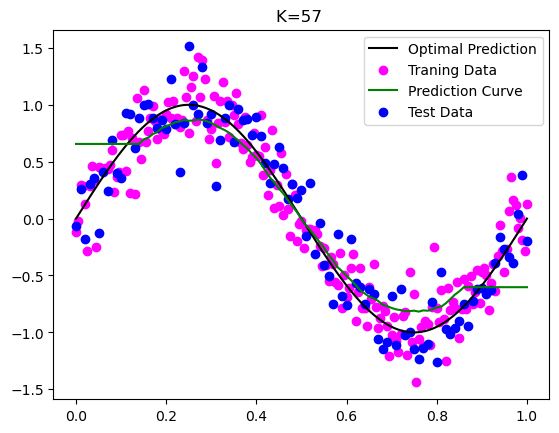

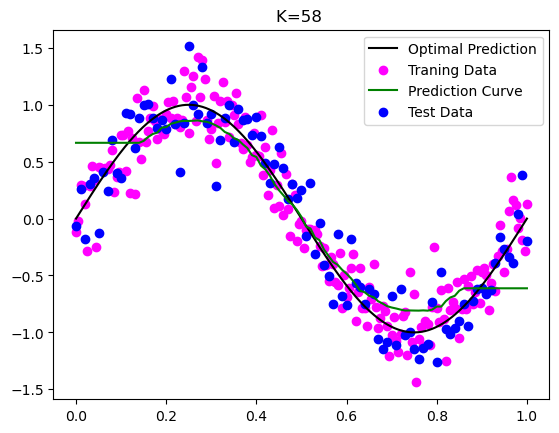

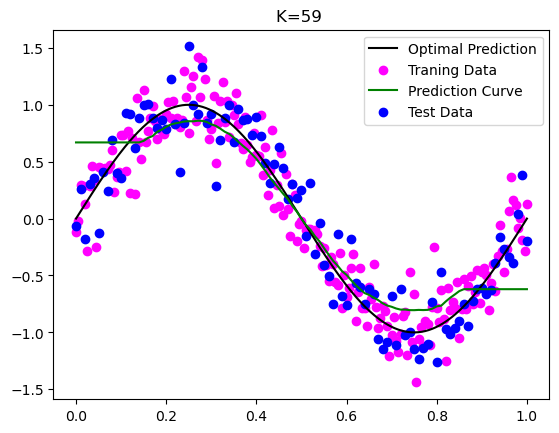

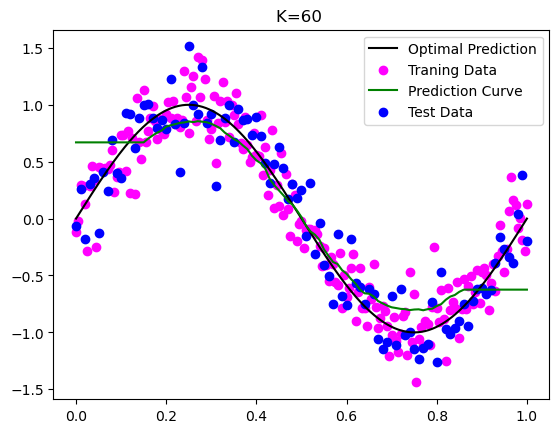

In [99]:
main()